In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
f = pd.read_excel('Resampling test_data_CDPHOLODEC.xlsx')

In [3]:
f.head()

,Time (s),Nc_CDP (cm-3),Nc_HOLODEC (cm-3)
0,62130,522.23,261.97
1,62131,527.76,348.15
2,62132,482.20,356.92
3,62133,421.96,364.31
4,62134,437.75,357.33


In [4]:
f.describe()

,Time (s),Nc_CDP (cm-3),Nc_HOLODEC (cm-3)
count,554.000000,554.000000,554.000000
mean,62429.389892,316.643953,325.654567
std,176.165423,75.730885,70.874262
min,62130.000000,40.400000,11.520000
25%,62276.250000,268.417500,287.207500
50%,62428.000000,313.335000,334.090000
75%,62580.750000,359.582500,370.342500
max,62735.000000,655.270000,481.510000


## Hypothesis Testing
공가정 H0 : 두 기기에서 측정된 값은 같다. Nc_CDP = Nc_HOLODEC

대체가정 HA : 두 기기에서 측정된 값은 다르다. Nc_CDP ≠ Nc_HOLODEC (Two-tailed test)

Test level α = 5% (So, confidence interval is 95%)

## 1. Two sample permutation test using L-scale statistics

In [5]:
# Firstly, we define uniform random number generator. (from HW3)
def uniform_rand(seed,length):
    aa  = 16807
    MM  = (2**31)-1
    cc  = 0.
    num = 0
    
    while num < length:
        seed = (aa * seed + cc) % MM
        quantity = seed / MM
        num += 1
        yield quantity #Quantity is u(n) = S(n)/M

In [6]:
# 1만번 resampling하므로 1만개의 난수 그룹이 필요함. 각 난수그룹은 두 데이터의 갯수만큼의 uniform random number가 필요.

tt=10000
u=np.zeros([tt, 2*len(f)])

for t in range(tt):
    j=0
    for i in uniform_rand(t**2+300,2*len(f)):
        u[t,j]=i
        j += 1

In [7]:
#L_real_CDP = 0 ; L_real_HOLO = 0 #Two lambda values for CDP & HOLO
#
#for i in range(len(f)):
#    for j in range(len(f)-i):
#        L_real_CDP  += abs(f['Nc_CDP (cm-3)'].iloc[i] - f['Nc_CDP (cm-3)'].iloc[i+j])
#        L_real_HOLO += abs(f['Nc_HOLODEC (cm-3)'].iloc[i] - f['Nc_HOLODEC (cm-3)'].iloc[i+j])
#        
#LL_real = L_real_CDP/L_real_HOLO
#print(LL_real)

In [8]:
# Scalar calculation
# Then we sort the data by the random number.
#uni_rand = pd.DataFrame(u[:,:].T)
#f2 = f['Nc_CDP (cm-3)'].append(f['Nc_HOLODEC (cm-3)']).to_frame().reset_index(drop=True)
#f2.columns = ['All data']
#LL = np.zeros(tt)
#
#for t in range(tt):
#    CDP_s  = f2.join(uni_rand.iloc[:,t]).sort_values(t).iloc[len(f):,0].array
#    HOLO_s = f2.join(uni_rand.iloc[:,t]).sort_values(t).iloc[:len(f),0].array
#    Lamda_CDP = 0. ; Lamda_HOLO =0. #Two lambda values for CDP & HOLO

#    for i in range(len(f)):
#        for j in range(len(f)-i):
#            Lamda_CDP  += abs(CDP_s[i] - CDP_s[i+j])
#            Lamda_HOLO += abs(HOLO_s[i] - HOLO_s[i+j])
            
#    LL[t] = Lamda_CDP/Lamda_HOLO
#

In [9]:
real_CDP  = f['Nc_CDP (cm-3)'].to_numpy()
real_HOLO = f['Nc_HOLODEC (cm-3)'].to_numpy()

CDP_vector  = np.repeat(real_CDP,len(real_CDP)).reshape([len(real_CDP),len(real_CDP)]) # 1-D array를 2-D array로 바꿈.
HOLO_vector = np.repeat(real_HOLO,len(real_HOLO)).reshape([len(real_HOLO),len(real_HOLO)]) # 길이가 n인 1-D array가 n x n인 2-d array로 변함

L_real_CDP = np.sum(abs(CDP_vector - CDP_vector.T))/2  # Lambda(CDP)와 Lambda(HOLO)는 자료의 길이가 같아 똑같은 값 (n-2)!/n!을 곱하므로 생략
L_real_HOLO = np.sum(abs(HOLO_vector - HOLO_vector.T))/2

LL_real = L_real_CDP/L_real_HOLO
LL_real # L-scale ratio of real data

1.0812093387179238

In [10]:
abs (CDP_vector - CDP_vector.T)

array([[  0.  ,   5.53,  40.03, ..., 479.27, 388.61, 250.2 ],
       [  5.53,   0.  ,  45.56, ..., 484.8 , 394.14, 255.73],
       [ 40.03,  45.56,   0.  , ..., 439.24, 348.58, 210.17],
       ...,
       [479.27, 484.8 , 439.24, ...,   0.  ,  90.66, 229.07],
       [388.61, 394.14, 348.58, ...,  90.66,   0.  , 138.41],
       [250.2 , 255.73, 210.17, ..., 229.07, 138.41,   0.  ]])

In [11]:
# Using vector calculation
# Then we sort the data by the random number.

uni_rand = pd.DataFrame(u[:,:].T)
f2 = f['Nc_CDP (cm-3)'].append(f['Nc_HOLODEC (cm-3)']).to_frame().reset_index(drop=True)
f2.columns = ['All data']
LL = np.zeros(tt)

for t in range(tt):
    CDP_s  = f2.join(uni_rand.iloc[:,t]).sort_values(t).iloc[len(f):,0].to_numpy() #t번째 난수로 sort하고 반으로 나눠서 각각 CDP, HOLO로 가정.
    HOLO_s = f2.join(uni_rand.iloc[:,t]).sort_values(t).iloc[:len(f),0].to_numpy()
    
    CDP_s_vector = np.repeat(CDP_s,len(CDP_s)).reshape([len(CDP_s),len(CDP_s)]) # 1-D array를 2-D array로 바꿈.
    HOLO_s_vector = np.repeat(HOLO_s,len(HOLO_s)).reshape([len(HOLO_s),len(HOLO_s)]) 
                                                       
    L_CDP = np.sum(abs(CDP_s_vector - CDP_s_vector.T))/2
    L_HOLO = np.sum(abs(HOLO_s_vector - HOLO_s_vector.T))/2

    LL[t] = L_CDP / L_HOLO # L-scale ratio of resampling data.

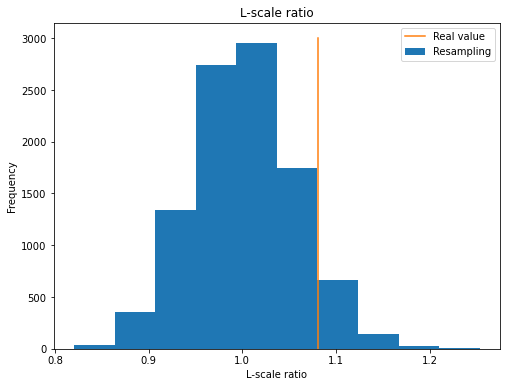

In [12]:
plt.figure(figsize=(8,6))
plt.hist(LL,label='Resampling')
plt.plot([LL_real,LL_real],[0,3000],label='Real value')
plt.xlabel('L-scale ratio') ; plt.ylabel('Frequency')
plt.title('L-scale ratio')
plt.legend()
plt.show()

In [13]:
# Get p-value
len(LL[LL>LL_real])/len(LL)

0.0819

### 소결 1
관측 값의 Test statistic L-scale 1.081보다 Resampling한 자료의 L-scale이 클 확률 (p-value)은 0.0819 (= 8.19%)이다.

이 때, 95% 신뢰구간의 Two-tailed test에서 한 쪽의 기각가능한 확률은 2.5%정도이다.

즉, p-value = 8.19% > 2.5% 이므로 이 공가정 H0는 기각하기 어렵다.

따라서, 두 기기로 측정한 수농도는 같다고 할 수 있다

## 2. Two sample permutation test using own test statistic. (Trimmed Coefficient of Variation ratio)

In [14]:
# If we want to resample 10000 time, then make 10000 different random number to sort the data

tt=10000
u=np.zeros([tt, 2*len(f)])

for t in range(tt):
    j=0
    for i in uniform_rand(t*2+300,2*len(f)):
        u[t,j]=i
        j += 1

In [15]:
T_CDP_real  = (stats.tstd(f['Nc_CDP (cm-3)'],limits=(f['Nc_CDP (cm-3)'].quantile(.1, interpolation='midpoint'),f['Nc_CDP (cm-3)'].quantile(.9, interpolation='midpoint')))
               /stats.tmean(f['Nc_CDP (cm-3)'],limits=(f['Nc_CDP (cm-3)'].quantile(.1, interpolation='midpoint'),f['Nc_CDP (cm-3)'].quantile(.9, interpolation='midpoint'))))
#상위 10%와 하위 10%를 제한 trimmed mean과 trimmed standard deviation으로 TCV를 구함
T_HOLO_real  = (stats.tstd(f['Nc_HOLODEC (cm-3)'],limits=(f['Nc_HOLODEC (cm-3)'].quantile(.1, interpolation='midpoint'),f['Nc_HOLODEC (cm-3)'].quantile(.9, interpolation='midpoint')))
               /stats.tmean(f['Nc_HOLODEC (cm-3)'],limits=(f['Nc_HOLODEC (cm-3)'].quantile(.1, interpolation='midpoint'),f['Nc_HOLODEC (cm-3)'].quantile(.9, interpolation='midpoint'))))

T_ratio_real = T_CDP_real/T_HOLO_real #두 자료의 TCV의 비율
T_ratio_real

1.1202318156955118

In [16]:
# Then we sort the data by the random number.
uni_rand = pd.DataFrame(u[:,:].T)
f2 = f['Nc_CDP (cm-3)'].append(f['Nc_HOLODEC (cm-3)']).to_frame().reset_index(drop=True)
f2.columns = ['All data']
T_ratio = np.zeros(tt)

for t in range(tt):
    CDP_s  = f2.join(uni_rand.iloc[:,t]).sort_values(t).iloc[len(f):,0]
    HOLO_s = f2.join(uni_rand.iloc[:,t]).sort_values(t).iloc[:len(f),0]
    #Two S values for CDP & HOLO
    T_CDP  = (stats.tstd(CDP_s,limits=(CDP_s.quantile(.1, interpolation='midpoint'),CDP_s.quantile(.9, interpolation='midpoint')))
               /stats.tmean(CDP_s,limits=(CDP_s.quantile(.1, interpolation='midpoint'),CDP_s.quantile(.9, interpolation='midpoint'))))
    T_HOLO = (stats.tstd(HOLO_s,limits=(HOLO_s.quantile(.1, interpolation='midpoint'),HOLO_s.quantile(.9, interpolation='midpoint')))
               /stats.tmean(HOLO_s,limits=(HOLO_s.quantile(.1, interpolation='midpoint'),HOLO_s.quantile(.9, interpolation='midpoint'))))

    T_ratio[t] = T_CDP/T_HOLO

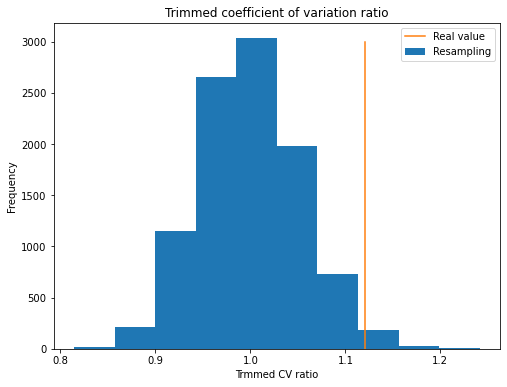

In [17]:
plt.figure(figsize=(8,6))
plt.hist(T_ratio,label='Resampling')
plt.plot([T_ratio_real,T_ratio_real],[0,3000],label='Real value')
plt.xlabel('Trmmed CV ratio') ; plt.ylabel('Frequency')
plt.title('Trimmed coefficient of variation ratio')
plt.legend()
plt.show()

## Real value의 위치를 눈으로 보기 위해 선으로 표기한 것으로, 실제 Real value가 3000개 있다는 뜻은 아님.

In [18]:
len(T_ratio[T_ratio > T_ratio_real])/len(T_ratio)

0.0161

### 소결 2-1
관측 값의 Test statistic 0.893보다 Resampling한 자료의 Test statistic이 작을 확률 (p-value)은 0.0161 (= 1.61%)이다.

이 때, 95% 신뢰구간의 Two-tailed test에서 한 쪽의 기각가능한 확률은 2.5%정도이다.

즉, p-value = 1.61% < 2.5% 이므로 공가정 H0는 기각하고 대립가설 HA을 채택할 수 있다.

따라서, 두 기기로 측정한 수농도는 다르다고 할 수 있다.

### 1번과 2번의 결론이 다르게 나와서 제 3의 방법인 Geometric mean ratio 이용.

In [19]:
G_ratio_real = stats.gmean(f['Nc_CDP (cm-3)']) / stats.gmean(f['Nc_HOLODEC (cm-3)'])
G_ratio_real

0.9778122759828876

In [20]:
# If we want to resample 10000 time, then make 10000 different random number to sort the data

tt=10000
u=np.zeros([tt, 2*len(f)])

for t in range(tt):
    j=0
    for i in uniform_rand(t*2+300,2*len(f)):
        u[t,j]=i
        j += 1

In [21]:
# Then we sort the data by the random number.
uni_rand = pd.DataFrame(u[:,:].T)
f2 = f['Nc_CDP (cm-3)'].append(f['Nc_HOLODEC (cm-3)']).to_frame().reset_index(drop=True)
f2.columns = ['All data']
G_ratio = np.zeros(tt)

for t in range(tt):
    CDP_s  = f2.join(uni_rand.iloc[:,t]).sort_values(t).iloc[len(f):,0]
    HOLO_s = f2.join(uni_rand.iloc[:,t]).sort_values(t).iloc[:len(f),0]
    #Two S values for CDP & HOLO
   
    G_ratio[t] = stats.gmean(CDP_s)/stats.gmean(HOLO_s)

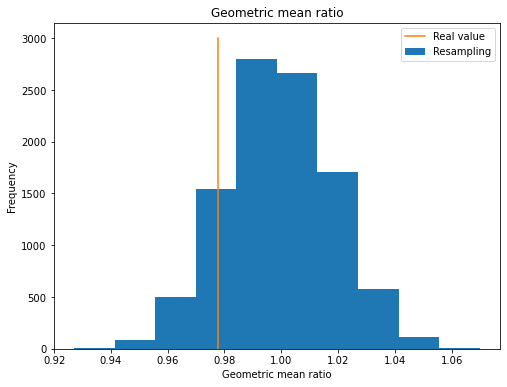

In [22]:
plt.figure(figsize=(8,6))
plt.hist(G_ratio,label='Resampling')
plt.plot([G_ratio_real,G_ratio_real],[0,3000],label='Real value')
plt.xlabel('Geometric mean ratio') ; plt.ylabel('Frequency')
plt.title('Geometric mean ratio')
plt.legend()
plt.show()

In [23]:
len(G_ratio[G_ratio < G_ratio_real])/len(G_ratio)

0.1278

### 소결 2-2

Geometric mean ratio를 이용해서 구한 p-value는 0.1278 (12.78%)로 2.5%보다 충분히 크므로 공가정을 기각할 수 없음.

즉, Test statistic을 어떻게 설정하냐에 따라서 기각 가능/불가능 여부가 다를 수 있다.

## 3. T-test
충분히 Sample이 많으니 Gaussian dist.로 근사할 수 있다고 가정함. Z ≃ t

공가설은 두 기기로 측정한 결과가 같다는 것이므로, 두 기기로 측정한 결과의 평균은 같다. (혹은 두 기기로 측정한 결과의 차이의 평균은 0이다.)

Paired data이므로 두 기기로 측정한 결과의 차이로 t test를 진행한다. (H0: 두 기기로 측정한 결과의 차이의 평균은 0이다.)

### Two sample t-test for differences

In [24]:
f['Nc_CDP (cm-3)'].corr(f['Nc_HOLODEC (cm-3)'], method='pearson'), f['Nc_CDP (cm-3)'].autocorr(lag=1), f['Nc_HOLODEC (cm-3)'].autocorr(lag=1)
# Data are paired and two are highly correlated, Each is serially correlated.

(0.7005198684695665, 0.7943397002001984, 0.6653321740665695)

#### Using delta

In [25]:
Nc_delta = f['Nc_CDP (cm-3)'] - f['Nc_HOLODEC (cm-3)']

In [26]:
mean_delta = f['Nc_CDP (cm-3)'].mean() - f['Nc_HOLODEC (cm-3)'].mean()

In [27]:
# Null hypothesis : Two are the same, so mean values of delta is the zero.
Z_pair = (mean_delta - 0)/np.sqrt(Nc_delta.var(ddof=1)/len(f))
Z_pair

-3.726851589067161

### 소결 3-1
Paired sample t-test에서 Z = -3.73으로 p-value = Pr{Z < -3.73} < 0.05% << 2.5%

즉, 공가설은 기각할 수 있고 대립가설을 채택할 수 있다. 따라서, 두 기기로 측정한 수농도는 다르다.

In [28]:
# scipy library로 해도 비슷한 결과가 나온다. statistic ≃ -3.73, p-value ≃ 0.02% < 0.05%
stats.ttest_1samp(f['Nc_CDP (cm-3)']-f['Nc_HOLODEC (cm-3)'], popmean=0)

Ttest_1sampResult(statistic=-3.726851589066879, pvalue=0.00021382840897299458)

#### Effective size 고려

그러나 이 자료가 serially correlated 되어 있으므로 델타의 effective size를 이용해 Z를 다시 구해보자.

In [29]:
eff_size = len(f) * (1-Nc_delta.autocorr(lag=1))/(1+Nc_delta.autocorr(lag=1))
eff_size #delta의 effective sample size

120.62325667313041

In [30]:
Z_pair_eff = (mean_delta - 0)/np.sqrt(Nc_delta.var(ddof=1)/eff_size)
Z_pair_eff # effective sample size를 고려한 test statistic

-1.7390126495831795

### 소결 3-2

p-value = Pr{Z < -1.74} = 4.09% > 2.5%

이 경우 공가설은 기각할 수 없다. 두 기기로 측정한 수농도는 같다고 할 수 있다.